<a href="https://colab.research.google.com/github/SophieShin/MachineLearning/blob/main/Ensemble(RandomForest%2C_Boosting%2C_Bagging).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신러닝 앙상블이란 **여러개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법**이다.

- 여러 모델을 이용하여 데이터를 학습하고, 모든 모델의 예측결과를 평균하여 예측

**앙상블 기법의 종류**
- 보팅 (Voting): 투표를 통해 결과 도출(Hard, Soft)
- 배깅 (Bagging): 샘플 중복 생성을 통해 결과 도출
- 부스팅 (Boosting): 이전 오차를 보완하면서 가중치 부여
- 스태킹 (Stacking): 여러 모델을 기반으로 예측된 결과를 통해 meta 모델이 다시 한번 예측

**참고자료 (블로그)**

* [보팅(Voting)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)
* [배깅(Bagging)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)
* [부스팅(Boosting)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3)

# Random Forests with 3 datasets

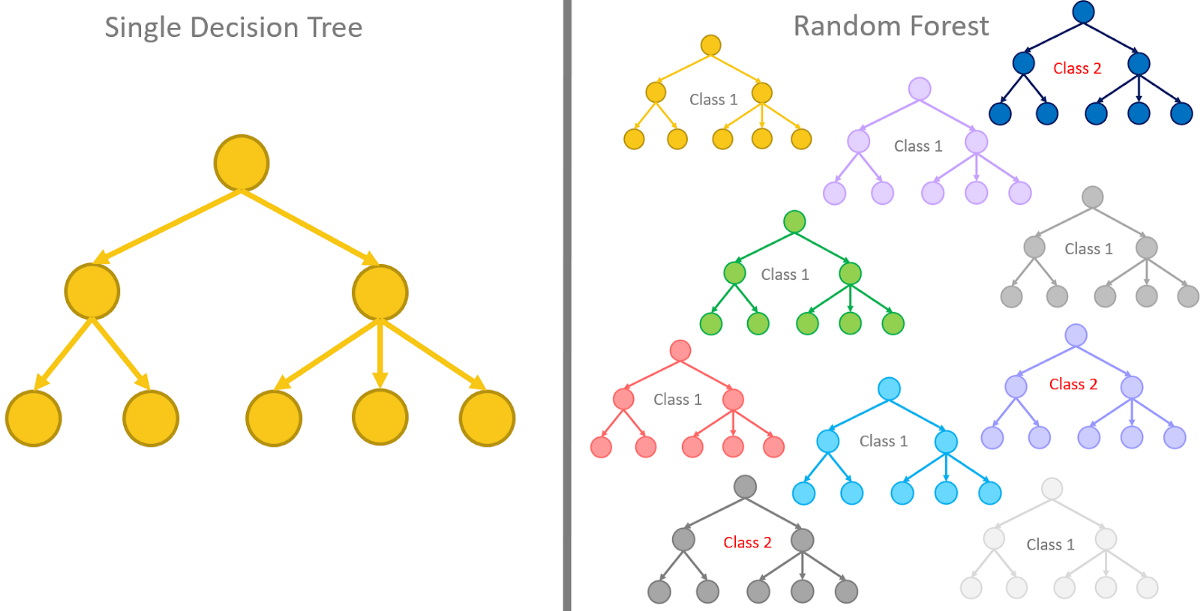

### 1)Forge Data

In [ ]:
# forge data vs two moons data

!pip install mglearn
import mglearn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


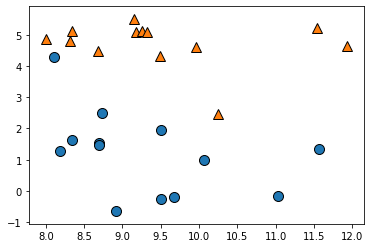

In [ ]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)



In [ ]:
# forge dataset을 가지고 트리 5개(n_estimators)로 구성된 Random Forest model 구성
# random forest는 여러개의 동일한 트리를 모델을 사용하되, 분기에 필요한 feature를 random하게 뽑음
# max_features: the number of features to consider when looing for the best split
# max_features의 default: auto(sqrt(n_features))

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5, random_state = 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

AttributeError: ignored

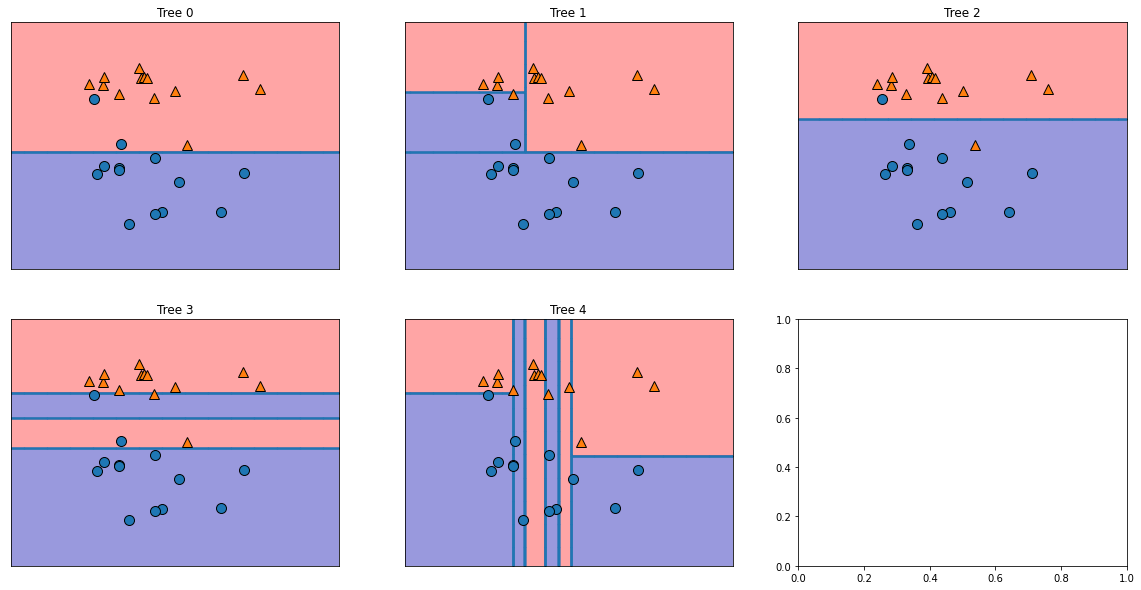

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X, y, tree, ax = ax)

mglearn.plots.plot_2d_separator(forest, X, fill = True, ax = axes[-1, -1], alpha = 0.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [ ]:
print('Training accuracy : {:.3f}'.format(forest.score(X_train,y_train)))
print('Test accuracy : {:.3f}'.format(forest.score(X_test, y_test)))

Training accuracy : 1.000
Test accuracy : 1.000


### 2)Two moons data

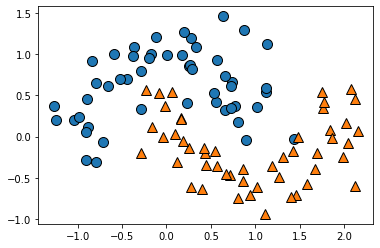

In [ ]:
# two moons 데이터셋은 forge dataset보다 크고 labeling이 혼재되어 있음

from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, noise = 0.25, random_state= 0)
mglearn.discrete_scatter(X[:,0], X[:,1],y)

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state= 5)

# two_moons 데이터셋을 가지고 트리 5개로 구성된 random forest model 만들기

forest = RandomForestClassifier(n_estimators= 5, random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

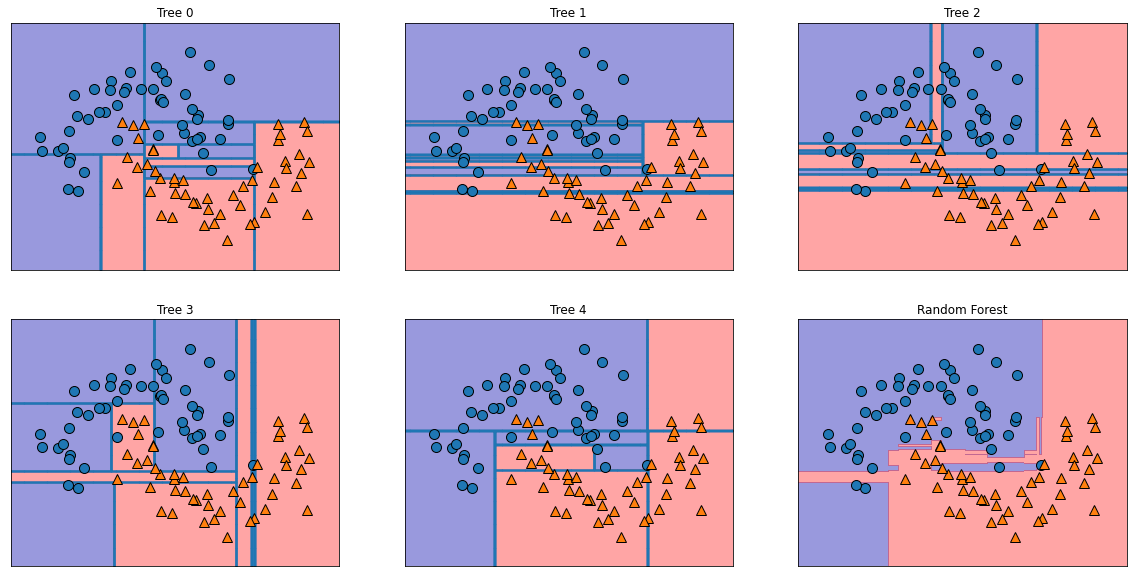

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill = True, ax = axes[-1, -1], alpha = 0.4)
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [ ]:
print('Training Accuracy : {:.3f}'.format(forest.score(X_train, y_train)))
print('Test Accuracy : {:.3f}'.format(forest.score(X_test, y_test)))

Training Accuracy : 0.987
Test Accuracy : 0.880


### 3)Cancer Data

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify = cancer['target'], random_state = 5)

In [ ]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [ ]:
y_train.shape, y_test.shape

((426,), (143,))

In [ ]:
forest = RandomForestClassifier(n_estimators = 100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
print('Training accuracy : {:.3f}'.format(forest.score(X_train,y_train)))
print('test Accuracy: {:.3f}'.format(forest.score(X_test, y_test)))

Training accuracy : 1.000
test Accuracy: 0.972


# Gradient Boosting


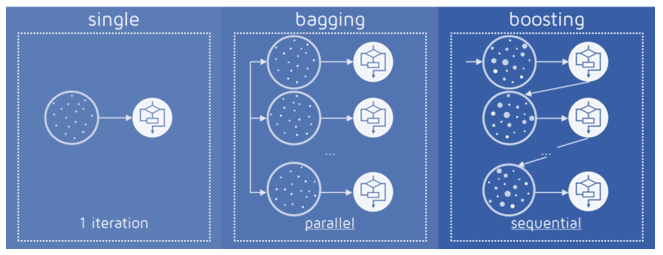

In [ ]:
# 여러개의 learning 모델을 순차적으로 구축하여 최종적으로 합침(앙상블)
# AdaBoost(Adaptive boosting), Gradient Boosting Machines(GBM), XGBoost 등이 있음

# 순차적! 각 단계에서 새로운 base learner를 학습하여 이전단계를 보완
# 각 단계를 거치면서 모델이 점차 강해짐(boosting!)
# (AdaBoost)training error가 큰 관측치의 선택확률(가중치)을 높임(오분류한 관측치에 보다 집중)
# 조정한 확률을 기반으로 다음단계에서 사용될 training set을 구성
# 최종결과물은 각 모델의 성능지표를 가중치로 하여 결합

# (GBM)앞 단계에서 나온 residual을 다음단계에서 fit
# GDM parameter default 깊이: 3, 트리 : 100개, 학습률 = 0.1

from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)
print('Training accuracy : {:.3f}'.format(gbrt.score(X_train,y_train)))
print('test Accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))

#과대적합됨

Training accuracy : 1.000
test Accuracy: 0.979


In [ ]:
# 과대적합을 줄이기 위하여 1. 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)
print('Training accuracy : {:.3f}'.format(gbrt.score(X_train,y_train)))
print('test Accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))


Training accuracy : 0.991
test Accuracy: 0.972


In [ ]:
# 2. 학습률을 낮춰볼 수 있음(parameter tuning)
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)                              

print('Training accuracy : {:.3f}'.format(gbrt.score(X_train,y_train)))
print('test Accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))


Training accuracy : 0.974
test Accuracy: 0.958


In [ ]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

NameError: ignored

# Bagging

### Bootstrapping

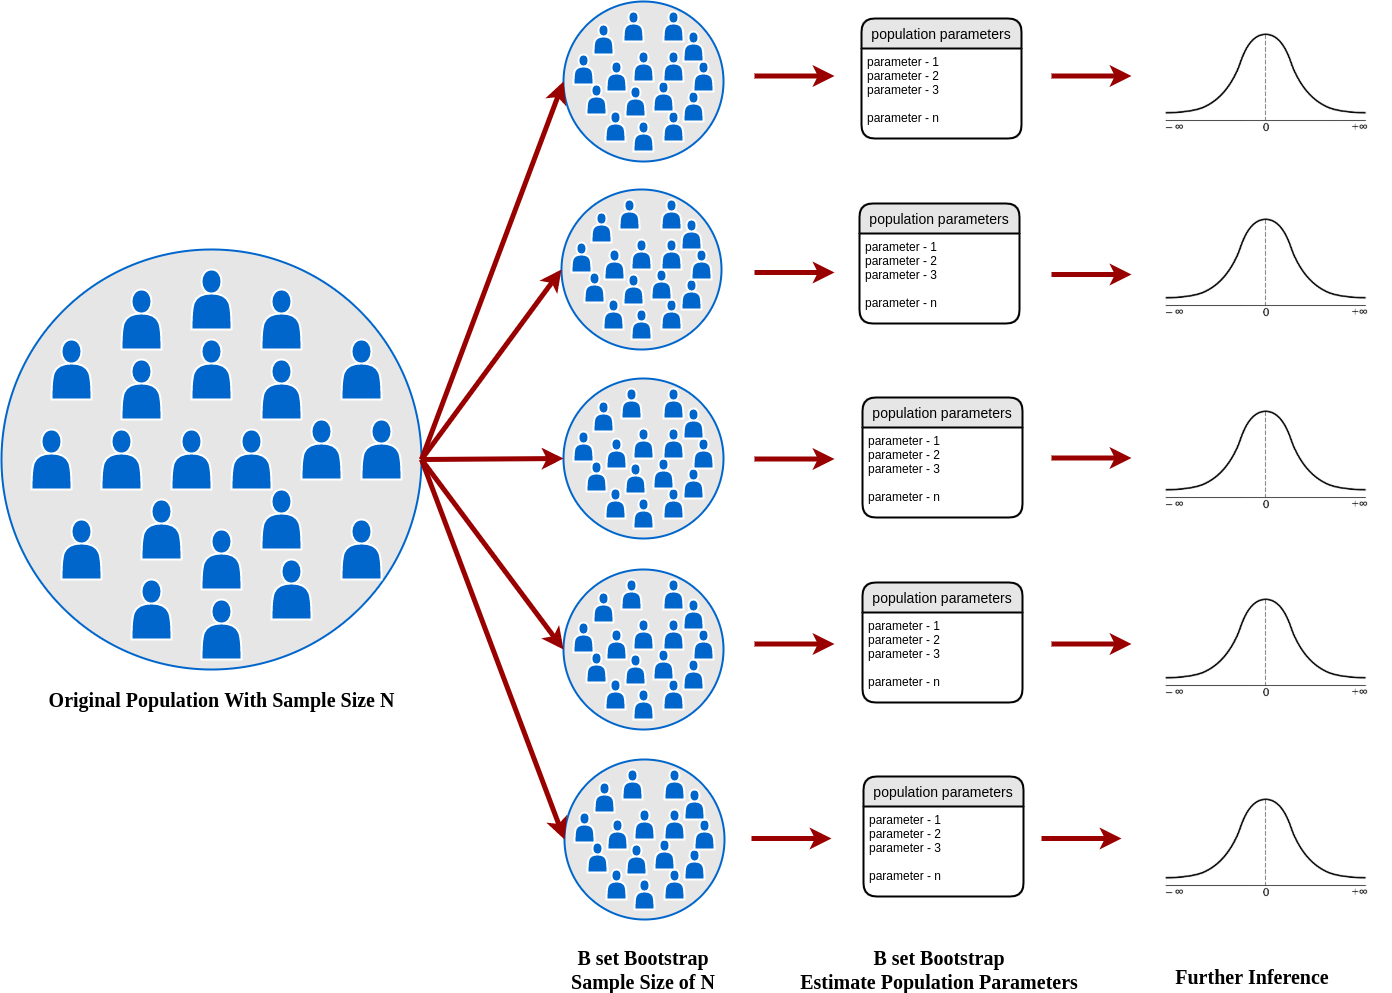

In [ ]:
# Bagging은 같은 모델을 여러 subsample로 학습하여 병렬적으로 앙상블(각각의 모델이 독립적)

# Bagging with Logistic Regression
# oob score : out-of-bag sample. 샘플링 되지 않은 나머지 데이터를 가지고 평가, 그 결과를 반영
# n_jobs : 병렬연산위해서 -1로 하면 using all processors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score = True, n_jobs = -1, random_state = 0)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
                  random_state=0, verb

In [ ]:
print('Training accuracy : {:.3f}'.format(bagging.score(X_train,y_train)))
print('test Accuracy: {:.3f}'.format(bagging.score(X_test, y_test)))
print('OOB sample Accuracy : {:.3f}'.format(bagging.oob_score_))

Training accuracy : 0.953
test Accuracy: 0.930
OOB sample Accuracy : 0.944


In [ ]:
# Bagging with Decision Tree
from sklearn.tree import DecisionTreeClassifier

bagging2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators =100, oob_score = True, n_jobs = -1, random_state = 0 )
bagging2.fit(X_train, y_train)



BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
print('Training accuracy : {:.3f}'.format(bagging2.score(X_train,y_train)))
print('test Accuracy: {:.3f}'.format(bagging2.score(X_test, y_test)))
print('OOB sample Accuracy : {:.3f}'.format(bagging2.oob_score_))

Training accuracy : 1.000
test Accuracy: 0.958
OOB sample Accuracy : 0.953


## *out of bag error

**Advantages of using OOB_Score:**

-No leakage of data: Since the model is validated on the OOB Sample, which means data hasn’t been used while training the model in any way, so there isn’t any leakage of data and henceforth ensures a better predictive model.

-Less Variance :  [More Variance ~ Overfitting due to more training score and less testing score]. Since OOB_Score ensures no leakage, so there is no over-fitting of the data and hence least variance.

-Better Predictive Model: OOB_Score helps in the least variance and hence it makes a much better predictive model than a model using other validation techniques.

-Less Computation: It requires less computation as it allows one to test the data as it is being trained.
    
**Disadvantages of using OOB_Error :**

-Time Consuming:  The method allows to test the data as it is being trained, but the overall process is a bit time-consuming as compared to other validation techniques.

-Not good for Large Datasets: As the process can be a bit time-consuming in comparison with the other techniques, so if the data size is huge, it may take a lot more time while training the model.

-Best for Small and medium-size datasets: Even if the process is time-consuming, but if the dataset is medium or small sized, OOB_Score should be preferred over other techniques for a much better predictive model.
 




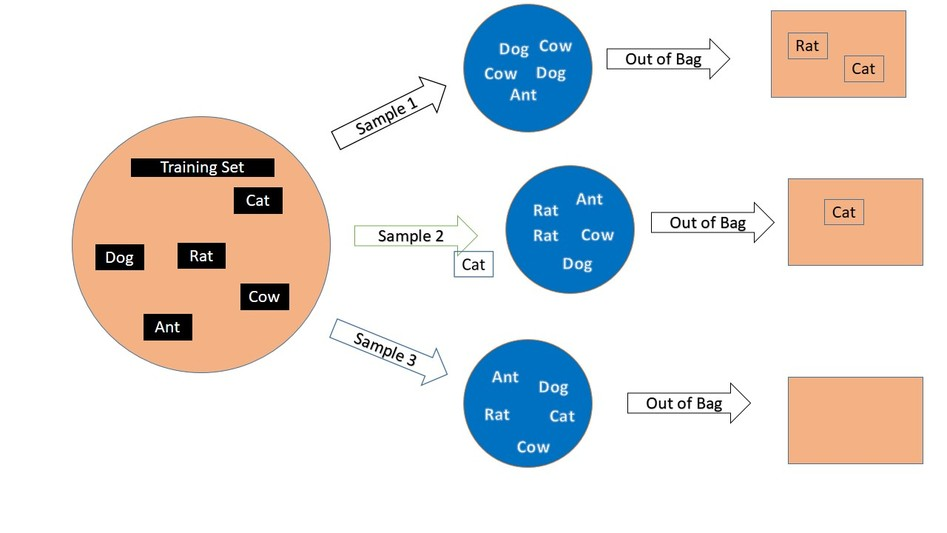